<a href="https://colab.research.google.com/github/Ritika-Gada/verbose-memory/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries


In [22]:
 import numpy as np
 import pandas as pd
 import seaborn as sns
 from sklearn.linear_model import LinearRegression
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import Lasso
 from sklearn import metrics
 import matplotlib.pyplot as plt

Data Collection and Analysis

In [3]:
car_price_data = pd.read_csv('/content/car data.csv')

In [4]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_price_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
car_price_data.isnull().mean()

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [8]:
car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
car_price_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
#checking the distribution of categorical data
print(car_price_data.Fuel_Type.value_counts())
print(car_price_data.Seller_Type.value_counts())
print(car_price_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [12]:
# encoding "Fuel_Type" Column
car_price_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_price_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_price_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)



In [13]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into training data and test data

In [15]:
X = car_price_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_price_data['Selling_Price']

In [16]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.1,random_state=2)

Model Training

1.Linear Regression

In [18]:
#loading the linear regression model
model=LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

Model evaluation


In [20]:
#Prediction og Training data
training_data_pred = model.predict(x_train)

In [21]:
#R squared Error
error_score = metrics.r2_score(y_train,training_data_pred)
print("R Squared Error : ", error_score)

R Squared Error :  0.8799451660493711


Visualize the actual prices and the predicted prices

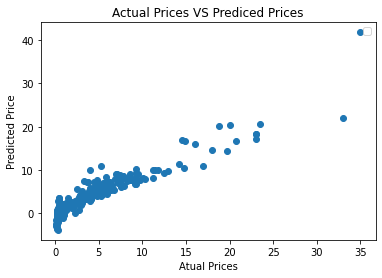

In [23]:
plt.scatter(y_train,training_data_pred)
plt.xlabel("Atual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Prediced Prices")
plt.legend()
plt.show()

In [24]:
#Prediction og Testing data
testing_data_pred = model.predict(x_test)

In [25]:
#R squared Error
error_score = metrics.r2_score(y_test,testing_data_pred)
print("R Squared Error : ", error_score)

R Squared Error :  0.8365766715027051


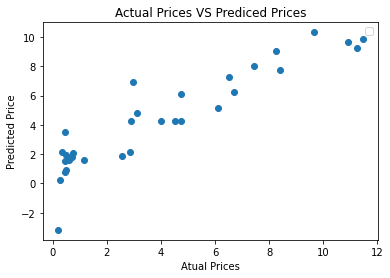

In [26]:
plt.scatter(y_test,testing_data_pred)
plt.xlabel("Atual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Prediced Prices")
plt.legend()
plt.show()

2. Lasso Regression


In [27]:
#loading the linear regression model
model_lass=Lasso()

In [28]:
model_lass.fit(x_train,y_train)

Lasso()

Model evaluation


In [29]:
#Prediction og Training data
training_data_pred = model_lass.predict(x_train)

In [30]:
#R squared Error
error_score = metrics.r2_score(y_train,training_data_pred)
print("R Squared Error : ", error_score)

R Squared Error :  0.8427856123435794


Visualize the actual prices and the predicted prices

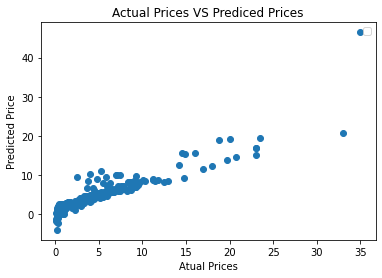

In [31]:
plt.scatter(y_train,training_data_pred)
plt.xlabel("Atual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Prediced Prices")
plt.legend()
plt.show()

In [32]:
#Prediction og Testing data
testing_data_pred = model_lass.predict(x_test)

In [33]:
#R squared Error
error_score = metrics.r2_score(y_test,testing_data_pred)
print("R Squared Error : ", error_score)

R Squared Error :  0.8709167941173195


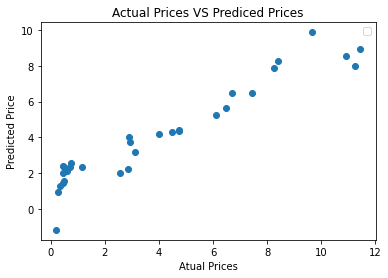

In [34]:
plt.scatter(y_test,testing_data_pred)
plt.xlabel("Atual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Prediced Prices")
plt.legend()
plt.show()